In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
data_dir = '../input/stanford-dogs-dataset/images/Images'

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

2025-06-09 16:02:19.828546: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749484939.851975      84 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749484939.858962      84 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 20580 files belonging to 120 classes.
Using 16464 files for training.


I0000 00:00:1749484953.239348      84 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749484953.239998      84 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [5]:
from tensorflow.keras import Sequential, layers

In [6]:
num_classes = len(class_names)

def init_model():
    model = Sequential()

    model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    
    model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D())    

    model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D()) 

    model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
    model.add(layers.MaxPooling2D()) 

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [7]:
def compile_model(model, optimizer):
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [8]:
model = init_model()
model = compile_model(model, 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 22, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 11, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3872)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         495,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │           7,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 553,848 (2.11 MB)

 Trainable params: 553,848 (2.11 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint_path = "model_1.keras"
checkpoint_dir = os.path.dirname(checkpoint_path)

es = EarlyStopping(patience=4, restore_best_weights=True, verbose=1)
mc = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=False, # Save only the weights, not the entire model
    verbose=1  # Print a message when the callback is called
)

epochs=100

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es,mc]
)



Epoch 1/100


I0000 00:00:1749485047.986394     141 service.cc:148] XLA service 0x7a7f5c08eea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749485047.987081     141 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749485047.987100     141 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749485048.378780     141 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/515 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.0056 - loss: 4.7870    

I0000 00:00:1749485051.608666     141 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0082 - loss: 4.7880
Epoch 1: saving model to model_1.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 47s 79ms/step - accuracy: 0.0082 - loss: 4.7880 - val_accuracy: 0.0148 - val_loss: 4.7535
Epoch 2/100
513/515 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0191 - loss: 4.6683
Epoch 2: saving model to model_1.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.0191 - loss: 4.6680 - val_accuracy: 0.0311 - val_loss: 4.5004
Epoch 3/100
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0330 - loss: 4.4395
Epoch 3: saving model to model_1.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.0330 - loss: 4.4394 - val_accuracy: 0.0454 - val_loss: 4.3455
Epoch 4/100
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0528 - loss: 4.2472
Epoch 4: saving model to model_1.keras
515/515 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.0528 - loss: 4.2470 - val_accuracy: 0.0598 - val_loss: 4.2325
Epoch 5/100
513/515 ━━━━━━━━

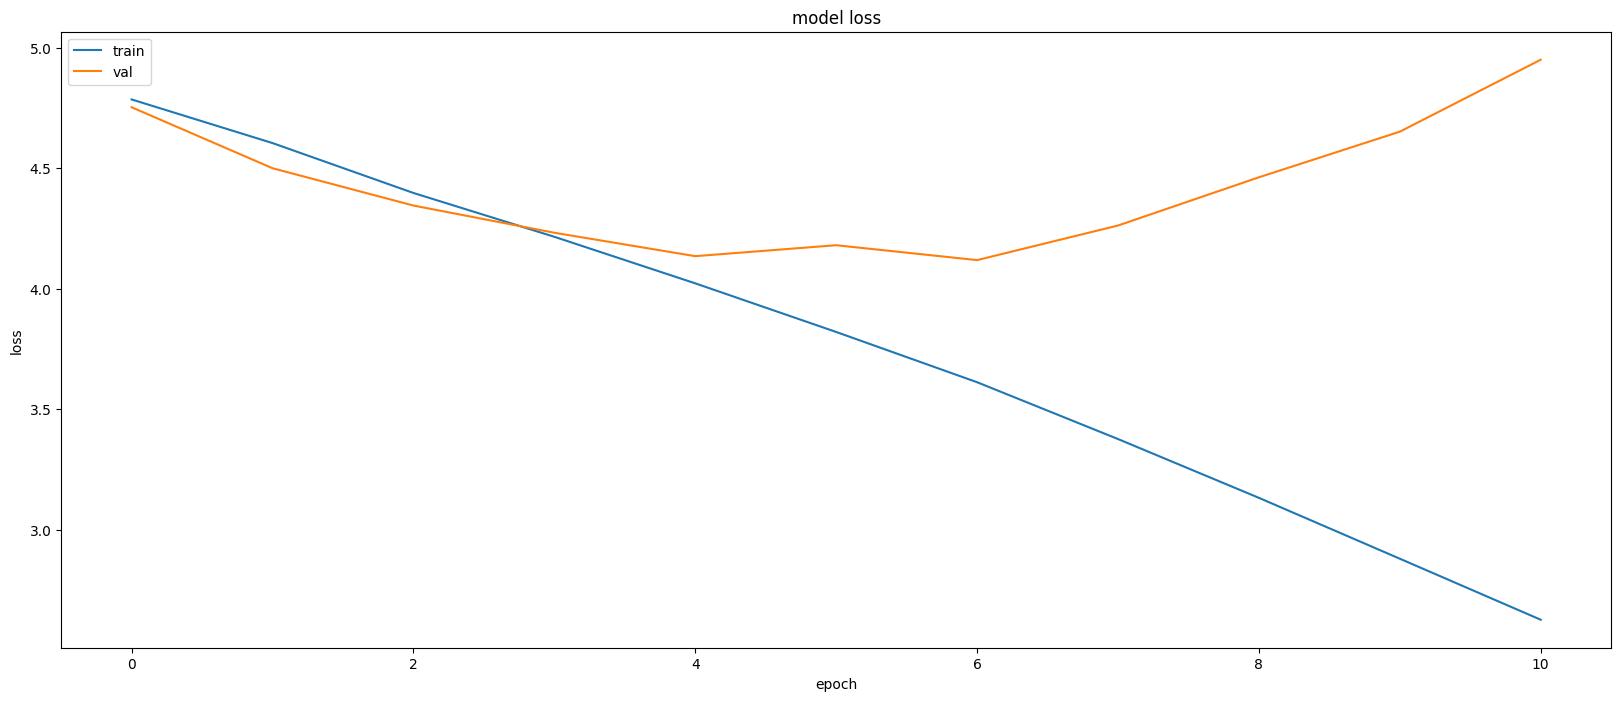

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

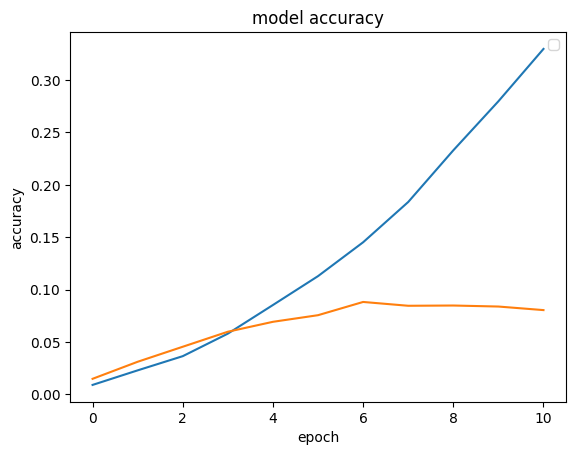

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [16]:
loss, accuracy = model.evaluate(val_ds)

129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.0877 - loss: 4.1048


In [17]:
accuracy

0.088192418217659